In [1]:
import numpy as np
import pandas as pd

In [2]:
data = pd.read_csv("Admission_Predict_Ver1.1.csv")

In [3]:
data

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
5,6,330,115,5,4.5,3.0,9.34,1,0.90
6,7,321,109,3,3.0,4.0,8.20,1,0.75
7,8,308,101,2,3.0,4.0,7.90,0,0.68
8,9,302,102,1,2.0,1.5,8.00,0,0.50
9,10,323,108,3,3.5,3.0,8.60,0,0.45


In [4]:
def computeLoss(X1,X2,X3,Y):
    loss=0
    n=len(X1)
    for i in range(n):
        loss+=((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])**2/n/2
    return loss

In [5]:

def computeGrad(X1,X2,X3,Y,i,doer):
    togtmol=2*((a*X1[i]+b*X2[i]+c*X3[i]+d)*r+ (e*X1[i]+f*X2[i]+\
                                              g*X3[i]+h)*j+k- Y[i])
    grad=0
    if(doer=="a"):
        grad=togtmol*X1[i]*r
    if(doer=="b"):
        grad=togtmol*X2[i]*r
    if(doer=="c"):
        grad=togtmol*X3[i]*r
    if(doer=="d"):
        grad=togtmol*r
    if(doer=="r"):
        grad=togtmol*(a*X1[i]+b*X2[i]+c*X3[i]+d)
    if(doer=="e"):
        grad=togtmol*X1[i]*j
    if(doer=="f"):
        grad=togtmol*X2[i]*j
    if(doer=="g"):
        grad=togtmol*X3[i]*j
    if(doer=="h"):
        grad=togtmol*j
    if(doer=="j"):
        grad=togtmol*(e*X1[i]+f*X2[i]+g*X3[i]+h)
    if(doer=="k"):
        grad=togtmol
    
    return grad

In [6]:
epoch=1000
learning_rate=0.000001

In [7]:
a= np.random.random_sample()
b= np.random.random_sample()
c= np.random.random_sample()
d= np.random.random_sample()
e= np.random.random_sample()
f= np.random.random_sample()
g= np.random.random_sample()
h= np.random.random_sample()
j= np.random.random_sample()
k= np.random.random_sample()
r= np.random.random_sample()

In [8]:
for i in range(epoch):
    print("epoch #", i)
    print("loss: ",computeLoss(data['GRE Score'],data['University Rating']\
                               ,data['CGPA'],data['Chance of Admit ']))
    which=i%len(data)
    (eh,dun,su,hariu)=\
    (data['GRE Score'],data['University Rating'],data['CGPA'],data['Chance of Admit '])
    a-=learning_rate* computeGrad(eh,dun,su,hariu,which,"a")
    b-=learning_rate* computeGrad(eh,dun,su,hariu,which,"b")
    c-=learning_rate* computeGrad(eh,dun,su,hariu,which,"c")
    d-=learning_rate* computeGrad(eh,dun,su,hariu,which,"d")
    e-=learning_rate* computeGrad(eh,dun,su,hariu,which,"e")
    f-=learning_rate* computeGrad(eh,dun,su,hariu,which,"f")
    g-=learning_rate* computeGrad(eh,dun,su,hariu,which,"g")
    h-=learning_rate* computeGrad(eh,dun,su,hariu,which,"h")
    r-=learning_rate* computeGrad(eh,dun,su,hariu,which,"r")
    j-=learning_rate* computeGrad(eh,dun,su,hariu,which,"j")
    k-=learning_rate* computeGrad(eh,dun,su,hariu,which,"k")
    print("a: "+str(a)+" b: "+str(b)+" c: "+str(c)+" d: "+str(d),end=" ")
    print("e: "+str(e)+" f: "+str(f)+" g: "+str(g)+" h: "+str(h))
    print(" r: "+str(r), " j: "+str(j), " k: "+str(k))
    print("--------------------------")


epoch # 0
loss:  251.7132888269331
a: 0.2768970342392913 b: 0.2447931234644789 c: 0.6194812707514183 d: 0.6723875913891563 e: 0.09526213006224024 f: 0.32963273391397824 g: 0.0977440654827529 h: 0.06718222571231018
 r: 0.21084065715929806  j: 0.0649219222354924  k: 0.40632225680842515
--------------------------
epoch # 1
loss:  234.98018738880546
a: 0.2738614210458931 b: 0.2447559965345038 c: 0.6193989419013133 d: 0.6723783097347913 e: 0.09433613776847992 f: 0.329621312026731 g: 0.09771873745119827 h: 0.06717937024277731
 r: 0.20662370521746523  j: 0.06350504944171835  k: 0.4062791752856858
--------------------------
epoch # 2
loss:  220.86395496439914
a: 0.2711332337420313 b: 0.2447303168596176 c: 0.6193304628209083 d: 0.6723697498965183 e: 0.09350479386136337 f: 0.3296134258780401 g: 0.09769770772288242 h: 0.0671767415280948
 r: 0.2028138495300197  j: 0.06222791143869771  k: 0.4062385629751798
--------------------------
epoch # 3
loss:  208.6667422064032
a: 0.26843228027331745 b: 0.24

loss:  66.77805333920875
a: 0.2278614487205375 b: 0.2442924310318582 c: 0.6181769469236001 d: 0.6722348308913906 e: 0.08057192452543747 f: 0.329482025526389 g: 0.09735107410941256 h: 0.0671361930867477
 r: 0.13464574582601488  j: 0.039078549983664786  k: 0.40545481895907104
--------------------------
epoch # 29
loss:  64.7210945829453
a: 0.2269287585024123 b: 0.24428643464300254 c: 0.6181550601074514 d: 0.6722318327031909 e: 0.08030217146965533 f: 0.32948028569491017 g: 0.09734472372459237 h: 0.0671353231711605
 r: 0.13295346011672377  j: 0.038499192159130675  k: 0.4054328460753564
--------------------------
epoch # 30
loss:  62.55468673743934
a: 0.2260821740426673 b: 0.244280808704309 c: 0.6181322750589646 d: 0.6722290197407667 e: 0.08005780751632213 f: 0.32947865703651985 g: 0.09733812765818987 h: 0.06713450884213339
 r: 0.1313883860010894  j: 0.0379650592462359  k: 0.4054119531100298
--------------------------
epoch # 31
loss:  60.603194444713715
a: 0.22511100409277318 b: 0.24427193

loss:  27.982980340702404
a: 0.20918879207977006 b: 0.2441011339286628 c: 0.6176798690251425 d: 0.672176591622386 e: 0.07533446969537508 f: 0.32942829425529513 g: 0.09721124483357357 h: 0.06711981274829072
 r: 0.09631769898881828  j: 0.025770780746950547  k: 0.4049595565716233
--------------------------
epoch # 56
loss:  27.19289995311149
a: 0.2087403624487297 b: 0.24409688457292933 c: 0.6176693872827502 d: 0.6721751751721505 e: 0.07521471022333981 f: 0.32942715744908285 g: 0.09720844071161677 h: 0.06711943381291871
 r: 0.09525992972846024  j: 0.025399087903151152  k: 0.4049450236751939
--------------------------
epoch # 57
loss:  26.451026751710586
a: 0.20834096418971373 b: 0.24409420836789192 c: 0.6176592177043464 d: 0.6721738370711317 e: 0.07510839069975182 f: 0.3294264439769904 g: 0.09720572951767936 h: 0.0671190770769009
 r: 0.09430569431677052  j: 0.025067242862576264  k: 0.4049311239346384
--------------------------
epoch # 58
loss:  25.79443251623441
a: 0.207944139499233 b: 0.2

loss:  13.383742767772492
a: 0.19986719757450522 b: 0.2440140213382384 c: 0.6174288451649593 d: 0.6721471347157097 e: 0.07295383173235832 f: 0.3294061240036722 g: 0.09714710934288896 h: 0.06711227705915894
 r: 0.07143865682395655  j: 0.017027293432209316  k: 0.404614347061522
--------------------------
epoch # 84
loss:  13.053524708562483
a: 0.19960786786976492 b: 0.24401021216595684 c: 0.6174216458311842 d: 0.6721463728821423 e: 0.07289209390288112 f: 0.32940521615527374 g: 0.09714539350944071 h: 0.06711209548949128
 r: 0.07063256935025372  j: 0.016738291057495816  k: 0.4046038213291988
--------------------------
epoch # 85
loss:  12.699259855188217
a: 0.19937972568897888 b: 0.24400735435362284 c: 0.6174154586684688 d: 0.6721456584297075 e: 0.07283808440867116 f: 0.32940453895885313 g: 0.09714392737920324 h: 0.06711192619039476
 r: 0.06991851619473415  j: 0.01648332982728062  k: 0.4045938206535302
--------------------------
epoch # 86
loss:  12.390433495310369
a: 0.1991618376928405 b:

loss:  7.199307812080235
a: 0.19517293433930455 b: 0.24396758720675782 c: 0.6173031086359443 d: 0.6721323322063123 e: 0.0719026197075274 f: 0.3293957271814221 g: 0.097118947487116 h: 0.06710895886954574
 r: 0.055351623534601484  j: 0.011304896236464775  k: 0.4043845318184819
--------------------------
epoch # 110
loss:  7.045599713232725
a: 0.19504596553917508 b: 0.24396550693749022 c: 0.6172995804998069 d: 0.6721319161527058 e: 0.0718767026707943 f: 0.32939530232206976 g: 0.09711822692565895 h: 0.06710887389767736
 r: 0.054850914937174935  j: 0.011122677055298867  k: 0.4043770910651899
--------------------------
epoch # 111
loss:  6.892143521324282
a: 0.19491164844957728 b: 0.24396383424203963 c: 0.6172959507510286 d: 0.672131497979073 e: 0.07184948273308416 f: 0.3293949631414625 g: 0.09711749090374414 h: 0.06710878910252746
 r: 0.05432051815009253  j: 0.010931731758963672  k: 0.40436955089826276
--------------------------
epoch # 112
loss:  6.731811067300711
a: 0.19479444829625953 b:

loss:  3.971940631414359
a: 0.1924256231288167 b: 0.243933947581602 c: 0.6172272312474436 d: 0.6721235975075776 e: 0.07139142208999681 f: 0.32938948796608514 g: 0.0971048289802646 h: 0.06710733143034069
 r: 0.04339701000102615  j: 0.006994835260560378  k: 0.40421039612408133
--------------------------
epoch # 137
loss:  3.8908812167082045
a: 0.1923496405962759 b: 0.24393346686037312 c: 0.6172252699048593 d: 0.672123357147027 e: 0.07137917965086317 f: 0.32938941048305026 g: 0.0971045128494825 h: 0.06710729268882352
 r: 0.04302604065952076  j: 0.006862695174565278  k: 0.40420491359178806
--------------------------
epoch # 138
loss:  3.8093426230351635
a: 0.19227210314721796 b: 0.24393299135767835 c: 0.6172231111226569 d: 0.6721231193957556 e: 0.07136681722295626 f: 0.3293893346406935 g: 0.0971041685251829 h: 0.06710725476764545
 r: 0.04264230814630684  j: 0.006726579193683782  k: 0.4041994479621585
--------------------------
epoch # 139
loss:  3.7260427976198502
a: 0.19219964151918922 b:

loss:  2.235684695723925
a: 0.19078875134403225 b: 0.24392018478389024 c: 0.617182368405551 d: 0.6721185041090315 e: 0.07116295883313627 f: 0.3293875686747495 g: 0.09709855305335963 h: 0.06710662160758547
 r: 0.034501570094010406  j: 0.0038071513331236115  k: 0.40408137607014327
--------------------------
epoch # 164
loss:  2.1883523495739414
a: 0.19074093691722832 b: 0.24391960360327689 c: 0.6171810592962692 d: 0.6721183588139118 e: 0.07115768400632541 f: 0.3293875045433178 g: 0.09709840859730973 h: 0.06710660557472758
 r: 0.03420694122871241  j: 0.0037001052368121506  k: 0.40407721154398357
--------------------------
epoch # 165
loss:  2.1407286111851436
a: 0.19069526039539644 b: 0.24391889451261414 c: 0.6171797871876946 d: 0.6721182169958142 e: 0.07115274445661303 f: 0.32938742784245306 g: 0.09709827099595848 h: 0.06710659023455469
 r: 0.03392157366581421  j: 0.0035954027988077415  k: 0.4040731102929171
--------------------------
epoch # 166
loss:  2.0950845526292996
a: 0.1906540046

loss:  1.3236372339394322
a: 0.18986169861589194 b: 0.24391021015158107 c: 0.6171570199993203 d: 0.6721155753914885 e: 0.07108289740477315 f: 0.3293867097965255 g: 0.09709636656356227 h: 0.06710636841959389
 r: 0.028266575378853926  j: 0.0015467536279313507  k: 0.40398938704538945
--------------------------
epoch # 190
loss:  1.2973567097095935
a: 0.1898343017269372 b: 0.24390978743100877 c: 0.6171562455752627 d: 0.6721154908473888 e: 0.07108139849234041 f: 0.3293866866651724 g: 0.09709632418692342 h: 0.06710636379332327
 r: 0.02806004655290004  j: 0.0014708151683089138  k: 0.40398642850559596
--------------------------
epoch # 191
loss:  1.271935575451183
a: 0.1898070989838161 b: 0.24390936640509583 c: 0.6171554894127529 d: 0.6721154066422201 e: 0.07107997284869005 f: 0.3293866645963952 g: 0.09709628455139958 h: 0.06710635937956784
 r: 0.027853761096152573  j: 0.0013948824995110637  k: 0.40398345985505546
--------------------------
epoch # 192
loss:  1.2468019855152521
a: 0.1897804031

loss:  0.732795035575898
a: 0.18920652765332283 b: 0.24390300657714653 c: 0.6171389006640257 d: 0.6721135168989447 e: 0.0710676254949496 f: 0.3293865410712759 g: 0.09709594511229448 h: 0.06710632026724415
 r: 0.022869788601625588  j: -0.00041616625039784887  k: 0.4039100015120761
--------------------------
epoch # 220
loss:  0.7187965817999467
a: 0.18919015177263096 b: 0.24390284963590875 c: 0.6171384429187531 d: 0.6721134645852035 e: 0.07106792345965535 f: 0.32938654392716754 g: 0.09709595344197847 h: 0.06710632121920804
 r: 0.02271876976723946  j: -0.0004709248515570358  k: 0.4039077366368785
--------------------------
epoch # 221
loss:  0.705127582042431
a: 0.18917360280969273 b: 0.24390269254169603 c: 0.6171379946766036 d: 0.6721134122204704 e: 0.07106826645859371 f: 0.3293865471834864 g: 0.0970959627333417 h: 0.06710632230464766
 r: 0.02256557301287436  j: -0.0005265397910477022  k: 0.40390545479872797
--------------------------
epoch # 222
loss:  0.6913976635160954
a: 0.189156446

loss:  0.4045297894475106
a: 0.18880053270842098 b: 0.24389936344484028 c: 0.6171278380266503 d: 0.6721122277349982 e: 0.07108961207365483 f: 0.3293867381043212 g: 0.09709654382272138 h: 0.06710638985765877
 r: 0.018787566834137  j: -0.0018968055032491588  k: 0.4038489474537327
--------------------------
epoch # 250
loss:  0.3966959906459717
a: 0.18878997644575932 b: 0.2438992644870319 c: 0.6171275553371794 d: 0.672112194749064 e: 0.07109067776399441 f: 0.3293867480951607 g: 0.09709657236321977 h: 0.06710639318793862
 r: 0.018669747841381024  j: -0.0019396708266837326  k: 0.403847209647599
--------------------------
epoch # 251
loss:  0.3888500541486734
a: 0.18877940059797554 b: 0.2438991975559459 c: 0.6171272541472934 d: 0.672112161283523 e: 0.07109177645233081 f: 0.32938675504887915 g: 0.09709660365495267 h: 0.06710639666479783
 r: 0.018550782605976986  j: -0.0019824268753094996  k: 0.4038454349968636
--------------------------
epoch # 252
loss:  0.381021233110262
a: 0.18876903145033

loss:  0.23010823195500563
a: 0.18855775701782188 b: 0.2438972062826085 c: 0.6171212444275228 d: 0.672111460589134 e: 0.0711233207246903 f: 0.3293870310824538 g: 0.09709745752346616 h: 0.0671064965592793
 r: 0.015856996658728882  j: -0.002961468121981765  k: 0.4038052061615382
--------------------------
epoch # 279
loss:  0.225562779550892
a: 0.18855122150824147 b: 0.2438971632878332 c: 0.6171210567553291 d: 0.6721114390917472 e: 0.07112454124604124 f: 0.32938703911218653 g: 0.09709749257324946 h: 0.06710650057414566
 r: 0.015770412156190947  j: -0.0029926576243198134  k: 0.40380386296686266
--------------------------
epoch # 280
loss:  0.2212685056217587
a: 0.18854452249794243 b: 0.243897098670264 c: 0.6171208706567306 d: 0.6721114175525583 e: 0.07112581241629977 f: 0.32938705137425783 g: 0.09709752788801475 h: 0.06710650466150275
 r: 0.015681125933373122  j: -0.0030251759228130063  k: 0.4038025104074123
--------------------------
epoch # 281
loss:  0.21687995069563923
a: 0.1885387846

loss:  0.13329872666228718
a: 0.1884046782106371 b: 0.24389585202365638 c: 0.6171170504808731 d: 0.6721109762600154 e: 0.07115786676560709 f: 0.32938733383939106 g: 0.09709840272885648 h: 0.06710660583062383
 r: 0.013690129436608816  j: -0.0037494219448040603  k: 0.4037728337476179
--------------------------
epoch # 308
loss:  0.13097954712464213
a: 0.18840024040492612 b: 0.24389580935400462 c: 0.6171169291568304 d: 0.6721109620367985 e: 0.07115908213749551 f: 0.3293873455256272 g: 0.09709843595672132 h: 0.06710660972603588
 r: 0.013622132400394225  j: -0.003774230519894496  k: 0.40377180490659076
--------------------------
epoch # 309
loss:  0.12844796787277163
a: 0.18839606266053976 b: 0.24389575509949418 c: 0.6171168125096337 d: 0.6721109484731714 e: 0.07116023960787131 f: 0.3293873605576694 g: 0.09709846827561198 h: 0.06710661348404641
 r: 0.013557430773853858  j: -0.0037980608839189487  k: 0.4037708187632794
--------------------------
epoch # 310
loss:  0.12606115774449833
a: 0.18

loss:  0.0767839982677408
a: 0.18830095145340983 b: 0.24389490557982468 c: 0.6171142506975477 d: 0.672110643873941 e: 0.07119046309754312 f: 0.3293876314708196 g: 0.097099282374375 h: 0.06710671024690656
 r: 0.01200337662127062  j: -0.0043645255467608295  k: 0.40374727369678176
--------------------------
epoch # 338
loss:  0.07602213786258666
a: 0.1882986274586652 b: 0.24389486960575538 c: 0.6171141878148749 d: 0.6721106366791274 e: 0.07119130809553947 f: 0.329387644551232 g: 0.09709930523893576 h: 0.06710671286298903
 r: 0.011962554333702012  j: -0.004379702509387238  k: 0.40374668063624897
--------------------------
epoch # 339
loss:  0.07489171098417324
a: 0.18829631810938913 b: 0.24389483396872 c: 0.61711412609153 d: 0.6721106295517205 e: 0.07119215356368658 f: 0.3293876575985274 g: 0.09709932783685138 h: 0.06710671547244809
 r: 0.011921894174006803  j: -0.004394825611714778  k: 0.40374609115342164
--------------------------
epoch # 340
loss:  0.07377524180417562
a: 0.1882938836041

loss:  0.0471894220368201
a: 0.1882344139892785 b: 0.24389437646269774 c: 0.6171125232365116 d: 0.6721104295726216 e: 0.07121712501607563 f: 0.32938784280108435 g: 0.09709997492152635 h: 0.06710679610963996
 r: 0.010789385542020335  j: -0.004806754992751084  k: 0.4037286903030778
--------------------------
epoch # 365
loss:  0.046557831121874595
a: 0.18823321147926173 b: 0.2438943618871883 c: 0.6171124898221563 d: 0.6721104259287443 e: 0.0712176607300249 f: 0.3293878492945541 g: 0.09709998980780571 h: 0.06710679773300739
 r: 0.010765939379054462  j: -0.004815376611745052  k: 0.4037283562767191
--------------------------
epoch # 366
loss:  0.046071172273675125
a: 0.18823139238842063 b: 0.2438943448336165 c: 0.6171124424132267 d: 0.6721104202442204 e: 0.0712184743514926 f: 0.32938785692221917 g: 0.0971000110127145 h: 0.06710680027556239
 r: 0.010730676631679478  j: -0.0048282785094919895  k: 0.4037278336154179
--------------------------
epoch # 367
loss:  0.045345574764578504
a: 0.188228

loss:  0.027905427074950716
a: 0.18818191174627585 b: 0.2438940207257792 c: 0.6171111472974095 d: 0.672110259466084 e: 0.07124261186919217 f: 0.32938801650596533 g: 0.09710064350945298 h: 0.06710687868287034
 r: 0.009726094834814864  j: -0.005192806071139712  k: 0.4037123007383615
--------------------------
epoch # 396
loss:  0.0276724686020921
a: 0.18818130118802068 b: 0.24389401508996947 c: 0.617111130183334 d: 0.6721102575874809 e: 0.07124293784248918 f: 0.32938801951493246 g: 0.09710065264668319 h: 0.06710687968585938
 r: 0.009712924998845301  j: -0.005197607866564869  k: 0.4037121096255916
--------------------------
epoch # 397
loss:  0.027478866304836376
a: 0.18818107446725113 b: 0.2438940123418954 c: 0.617111123691009 d: 0.6721102569004623 e: 0.0712430591634526 f: 0.3293880209854809 g: 0.09710065612085397 h: 0.06710688005349649
 r: 0.009708003528139449  j: -0.005199415955748553  k: 0.40371203967181324
--------------------------
epoch # 398
loss:  0.027406708712626668
a: 0.188179

loss:  0.01795174536824352
a: 0.1881465062516107 b: 0.24389370812218691 c: 0.6171102332517908 d: 0.6721101453044203 e: 0.0712627967838509 f: 0.32938819478285813 g: 0.09710116428667483 h: 0.06710694376916275
 r: 0.008936903395506521  j: -0.0054815060859317545  k: 0.4037002063453415
--------------------------
epoch # 422
loss:  0.017812726625390282
a: 0.18814569230400888 b: 0.24389369801120403 c: 0.6171102104515245 d: 0.6721101427766746 e: 0.07126329601547185 f: 0.32938820098445454 g: 0.0971011782712747 h: 0.06710694531956184
 r: 0.008917727588703128  j: -0.005488570220419901  k: 0.40369992645979075
--------------------------
epoch # 423
loss:  0.01761718941287322
a: 0.18814600007740642 b: 0.24389370261850848 c: 0.6171102192422613 d: 0.6721101436981355 e: 0.07126310659435713 f: 0.3293881981488282 g: 0.09710117286089959 h: 0.06710694475243657
 r: 0.00892502459748315  j: -0.0054858652344749615  k: 0.4037000286145321
--------------------------
epoch # 424
loss:  0.017691404197726752
a: 0.18

loss:  0.015002823429177277
a: 0.1881340141799405 b: 0.2438936406888482 c: 0.6171099119521603 d: 0.672110104958598 e: 0.07127064115383455 f: 0.3293882367090313 g: 0.09710136590837297 h: 0.06710696910791566
 r: 0.008642552471504807  j: -0.005588081842957715  k: 0.4036956667779816
--------------------------
epoch # 452
loss:  0.01504739915570611
a: 0.18813441743634862 b: 0.24389364560653023 c: 0.6171099237545972 d: 0.6721101061880185 e: 0.0712703804214217 f: 0.32938823352938906 g: 0.09710135827723168 h: 0.06710696831300512
 r: 0.008652407628812172  j: -0.005584461998214013  k: 0.4036958074774939
--------------------------
epoch # 453
loss:  0.015132155303546859
a: 0.1881337865748192 b: 0.24389363967375358 c: 0.6171099064308894 d: 0.6721101042104263 e: 0.07127078758768848 f: 0.3293882373585146 g: 0.09710136945827826 h: 0.0671069695893803
 r: 0.008637134368195291  j: -0.0055900436640525545  k: 0.40369558123551813
--------------------------
epoch # 454
loss:  0.01500111291501394
a: 0.188133

loss:  0.011783134609712049
a: 0.1881158295988064 b: 0.24389348785665557 c: 0.6171094406731993 d: 0.6721100450888325 e: 0.0712828539944806 f: 0.32938833992961924 g: 0.09710168248360994 h: 0.06710700930914013
 r: 0.008193234925346907  j: -0.00575233110757424  k: 0.403688633401301
--------------------------
epoch # 481
loss:  0.011772685042145866
a: 0.18811565625031773 b: 0.24389348570995514 c: 0.6171094361221944 d: 0.6721100445521574 e: 0.0712829756978046 f: 0.32938834143677076 g: 0.09710168567877112 h: 0.067107009685928
 r: 0.008188804246126623  j: -0.005753968755563254  k: 0.4036885685815753
--------------------------
epoch # 482
loss:  0.011746083107415485
a: 0.18811571338181127 b: 0.24389348640667063 c: 0.617109437649743 d: 0.6721100447263363 e: 0.07128293555420469 f: 0.32938834094721814 g: 0.09710168460542702 h: 0.06710700956353985
 r: 0.008190266821996535  j: -0.005753429028083499  k: 0.4036885896229993
--------------------------
epoch # 483
loss:  0.01175485035019955
a: 0.1881153

loss:  0.01082888091822978
a: 0.18810783141199383 b: 0.24389342834032243 c: 0.6171092348937619 d: 0.6721100182663049 e: 0.07128856128005967 f: 0.3293883821289669 g: 0.09710182926685798 h: 0.06710702845885522
 r: 0.007987960017902104  j: -0.0058271893525359995  k: 0.4036853521143259
--------------------------
epoch # 509
loss:  0.010659406628576966
a: 0.18810603855669383 b: 0.24389341168863732 c: 0.6171091871589313 d: 0.6721100127157432 e: 0.07128986914440608 f: 0.3293883942762277 g: 0.09710186408900559 h: 0.06710703250794213
 r: 0.007941078312850923  j: -0.005844345560338776  k: 0.40368466443437795
--------------------------
epoch # 510
loss:  0.010438694117232165
a: 0.18810461843378373 b: 0.2438933985799851 c: 0.617109150454705 d: 0.6721100083461925 e: 0.07129091428941643 f: 0.3293884039236505 g: 0.09710189110178939 h: 0.06710703572374971
 r: 0.007903815057853685  j: -0.005857997514730376  k: 0.4036841199225827
--------------------------
epoch # 511
loss:  0.010272166325767272
a: 0.18

loss:  0.009606870822566869
a: 0.18809883548586334 b: 0.24389338404601482 c: 0.6171090166030283 d: 0.6721099882630343 e: 0.0712952362357167 f: 0.32938841422529347 g: 0.09710199087024125 h: 0.06710705075399526
 r: 0.007752773529651196  j: -0.005912501718577626  k: 0.40368158220866784
--------------------------
epoch # 535
loss:  0.009679041420852519
a: 0.18809933807688367 b: 0.24389339189890286 c: 0.6171090310523423 d: 0.6721099898336118 e: 0.07129485294918811 f: 0.32938840823648435 g: 0.09710197985083246 h: 0.06710704955623344
 r: 0.007766500588813236  j: -0.0059073990437701574  k: 0.40368178267013893
--------------------------
epoch # 536
loss:  0.009727765476706673
a: 0.18809880529737844 b: 0.24389338833519877 c: 0.6171090160847852 d: 0.6721099880517598 e: 0.07129525819053596 f: 0.3293884109471119 g: 0.09710199123546819 h: 0.0671070509115472
 r: 0.007752141896924612  j: -0.005912602379276929  k: 0.40368155527882493
--------------------------
epoch # 537
loss:  0.009676973763078623
a:

loss:  0.008711518274238932
a: 0.1880824439685546 b: 0.2438932990372536 c: 0.6171086040750631 d: 0.6721099345876848 e: 0.07130823425839526 f: 0.3293884821501454 g: 0.0971023182401475 h: 0.06710709330184007
 r: 0.0073030892203787764  j: -0.006075525410320681  k: 0.40367453808630654
--------------------------
epoch # 565
loss:  0.008679198679734764
a: 0.18808150478940536 b: 0.24389328747825584 c: 0.6171085782984981 d: 0.6721099316979353 e: 0.07130901556371215 f: 0.3293884917661358 g: 0.0971023396838062 h: 0.06710709570583767
 r: 0.007276072293689249  j: -0.0060854924008782035  k: 0.4036741465969712
--------------------------
epoch # 566
loss:  0.008655647566276037
a: 0.18808084699967464 b: 0.243893281443556 c: 0.6171085601541673 d: 0.6721099296863687 e: 0.07130956571342013 f: 0.32938849681334087 g: 0.09710235485906939 h: 0.06710709738823935
 r: 0.007257142301126467  j: -0.006092407411053997  k: 0.40367387307748104
--------------------------
epoch # 567
loss:  0.008641638861707832
a: 0.18

loss:  0.008661681447874119
a: 0.18808014965948114 b: 0.24389332513490264 c: 0.6171085614991544 d: 0.6721099257593305 e: 0.07131012001581813 f: 0.32938845995994886 g: 0.0971023529453839 h: 0.06710710058273467
 r: 0.007241020528339275  j: -0.006097111253561332  k: 0.40367334297441754
--------------------------
epoch # 592
loss:  0.008631518345499639
a: 0.18807853106687158 b: 0.24389331427196614 c: 0.6171085178844644 d: 0.6721099203278623 e: 0.07131148289653395 f: 0.3293884691067389 g: 0.09710238966974594 h: 0.06710710515612966
 r: 0.007194392792829439  j: -0.006114048758794333  k: 0.40367259945019934
--------------------------
epoch # 593
loss:  0.008609886274048812
a: 0.1880773446442749 b: 0.24389330638883347 c: 0.6171084868249216 d: 0.672109916386296 e: 0.0713124911508412 f: 0.3293884758060577 g: 0.09710241606506195 h: 0.06710710850578905
 r: 0.0071600779635867026  j: -0.006126526878171891  k: 0.40367205645892795
--------------------------
epoch # 594
loss:  0.008601852508642403
a: 0.

loss:  0.008643365442246061
a: 0.18807138435091608 b: 0.24389325474891105 c: 0.6171083360275876 d: 0.6721098956967175 e: 0.07131765127450664 f: 0.32938852042594907 g: 0.09710254658951228 h: 0.06710712642598365
 r: 0.006985394950669722  j: -0.006190582193710789  k: 0.40366916564254524
--------------------------
epoch # 619
loss:  0.00866479209021995
a: 0.18807131905816324 b: 0.24389325375056134 c: 0.6171083342625053 d: 0.6721098954970476 e: 0.07131770913750993 f: 0.32938852131069724 g: 0.09710254815374701 h: 0.06710712660293329
 r: 0.0069834270746805946  j: -0.006191315304232835  k: 0.40366913736779053
--------------------------
epoch # 620
loss:  0.008666493621927833
a: 0.18807228393072922 b: 0.2438932681514868 c: 0.6171083617970747 d: 0.6721098983772327 e: 0.07131685371727536 f: 0.3293885085433409 g: 0.09710252374256173 h: 0.06710712404946205
 r: 0.007012625051962557  j: -0.006180481843726738  k: 0.40366954508664177
--------------------------
epoch # 621
loss:  0.008643528926099871
a:

loss:  0.008644045963805358
a: 0.1880810537793881 b: 0.24389336938589815 c: 0.6171086108036307 d: 0.672109924589356 e: 0.07130930240098321 f: 0.3293884211634167 g: 0.0971023093060385 h: 0.06710710148783296
 r: 0.007271509485604101  j: -0.0060853747564713736  k: 0.4036731798864794
--------------------------
epoch # 648
loss:  0.008652479679261447
a: 0.18808203026315934 b: 0.24389338090769053 c: 0.617108639032022 d: 0.6721099274698041 e: 0.07130848521200524 f: 0.32938841152115095 g: 0.09710228568248744 h: 0.06710709907726654
 r: 0.007299814628217272  j: -0.006074980792691325  k: 0.40367357141486127
--------------------------
epoch # 649
loss:  0.008676597436361882
a: 0.18808229208963365 b: 0.24389338259144472 c: 0.6171086459859267 d: 0.6721099283116813 e: 0.0713082673195689 f: 0.3293884101199234 g: 0.09710227989541774 h: 0.06710709837665278
 r: 0.0073072821919713754  j: -0.006072269893580431  k: 0.4036736856470096
--------------------------
epoch # 650
loss:  0.008683711642089103
a: 0.18

loss:  0.008722027255601962
a: 0.18808377658366854 b: 0.24389344148667444 c: 0.6171086978828113 d: 0.6721099317062924 e: 0.0713070217941263 f: 0.3293883611028244 g: 0.09710223645102298 h: 0.0671070955175165
 r: 0.007352441628408925  j: -0.0060545515304114  k: 0.40367414560993903
--------------------------
epoch # 678
loss:  0.008733980773038979
a: 0.18808371488743836 b: 0.2438934408876881 c: 0.617108696261555 d: 0.6721099315066303 e: 0.0713070725989017 f: 0.32938836159607116 g: 0.09710223778607763 h: 0.06710709568193209
 r: 0.007350689200877184  j: -0.006055194543577253  k: 0.40367411871112163
--------------------------
epoch # 679
loss:  0.00873182663785373
a: 0.1880837052285724 b: 0.24389344079330275 c: 0.617108696001366 d: 0.6721099314751685 e: 0.07130708055539595 f: 0.32938836167382135 g: 0.09710223800040907 h: 0.06710709570784883
 r: 0.007350414209873009  j: -0.006055295354565909  k: 0.403674114471162
--------------------------
epoch # 680
loss:  0.008731490233418035
a: 0.18808363

loss:  0.00902151537534869
a: 0.18808907032267339 b: 0.24389353619637247 c: 0.6171088533234969 d: 0.6721099471355109 e: 0.07130271108840154 f: 0.32938828426571 g: 0.0971021099788384 h: 0.06710708294320329
 r: 0.007504271577163638  j: -0.005997830528326816  k: 0.4036762040671959
--------------------------
epoch # 707
loss:  0.008987646644538307
a: 0.18808867330415296 b: 0.24389353235429934 c: 0.6171088430523547 d: 0.6721099458548199 e: 0.07130302840421082 f: 0.3293882873364869 g: 0.0971021181880487 h: 0.0671070839667956
 r: 0.007493236590141001  j: -0.006001881631587183  k: 0.4036760350277775
--------------------------
epoch # 708
loss:  0.008964813418818869
a: 0.18808821471965284 b: 0.24389352934721928 c: 0.617108830783468 d: 0.6721099443512798 e: 0.07130339571426171 f: 0.32938828974506124 g: 0.09710212801503207 h: 0.06710708517108277
 r: 0.007480482690562312  j: -0.006006512224520058  k: 0.40367583621298014
--------------------------
epoch # 709
loss:  0.0089393192894242
a: 0.18808796

loss:  0.009067338859593132
a: 0.1880898297092996 b: 0.2438935729691166 c: 0.6171088824328989 d: 0.6721099483934363 e: 0.07130209276329429 f: 0.3293882549663109 g: 0.09710208643741339 h: 0.0671070818957527
 r: 0.007527268879164154  j: -0.005988680860709801  k: 0.4036763711502869
--------------------------
epoch # 734
loss:  0.009037948381937947
a: 0.18809051635911597 b: 0.2438935833727733 c: 0.6171089018045076 d: 0.6721099504741677 e: 0.07130154647274972 f: 0.3293882466892461 g: 0.09710207102551874 h: 0.06710708024033975
 r: 0.007546537467632041  j: -0.00598152329208455  k: 0.4036766445133177
--------------------------
epoch # 735
loss:  0.009082089364097932
a: 0.1880910624142928 b: 0.24389359174775133 c: 0.617108917264717 d: 0.6721099521491632 e: 0.0713011136646978 f: 0.32938824005113626 g: 0.09710205877156802 h: 0.06710707891271779
 r: 0.007561831235570067  j: -0.005975839287031608  k: 0.40367686406558595
--------------------------
epoch # 736
loss:  0.009118636264248687
a: 0.1880914

loss:  0.00912951153356493
a: 0.18809096548645896 b: 0.24389361670578436 c: 0.6171089203315079 d: 0.67210995116932 e: 0.07130118259003394 f: 0.32938822018257624 g: 0.09710205611950443 h: 0.0671070796646889
 r: 0.00756057701922467  j: -0.005975613412950857  k: 0.40367673610294197
--------------------------
epoch # 762
loss:  0.009116112812887297
a: 0.18809073712209434 b: 0.24389361522291494 c: 0.6171089141331138 d: 0.6721099504278853 e: 0.07130136307921427 f: 0.32938822135457596 g: 0.09710206101846328 h: 0.06710708025068876
 r: 0.00755427624289682  j: -0.005977898770490684  k: 0.40367663895478506
--------------------------
epoch # 763
loss:  0.009100973721945554
a: 0.18809041346874453 b: 0.24389361222616057 c: 0.6171089053526234 d: 0.6721099494289673 e: 0.07130161919160669 f: 0.3293882237259692 g: 0.09710206796664549 h: 0.06710708104115318
 r: 0.007545315007875647  j: -0.0059811755630175285  k: 0.40367650810214295
--------------------------
epoch # 764
loss:  0.009079811248215068
a: 0.1

loss:  0.009035826254173051
a: 0.18808992856141352 b: 0.24389365166210927 c: 0.6171089014968845 d: 0.6721099467529971 e: 0.07130198953925627 f: 0.3293881919203363 g: 0.09710207054899332 h: 0.06710708312841508
 r: 0.007534309216015046  j: -0.005984021852634761  k: 0.40367615713080085
--------------------------
epoch # 789
loss:  0.009055282085650946
a: 0.18809009568385635 b: 0.243893653263904 c: 0.6171089063022687 d: 0.6721099472869286 e: 0.07130185680602384 f: 0.32938819064814173 g: 0.09710206673240959 h: 0.06710708270435023
 r: 0.007538974335551479  j: -0.0059823184758310945  k: 0.40367622730018365
--------------------------
epoch # 790
loss:  0.009065958033884406
a: 0.1880893383818343 b: 0.2438936483303932 c: 0.6171088874315899 d: 0.6721099448201733 e: 0.07130245773303422 f: 0.32938819456294927 g: 0.09710208170654841 h: 0.06710708466175398
 r: 0.007518156610345714  j: -0.005989899479854383  k: 0.40367590310518214
--------------------------
epoch # 791
loss:  0.009019285937752223
a: 0

loss:  0.008784859159668215
a: 0.18808387431984228 b: 0.24389361929429676 c: 0.6171087458200628 d: 0.6721099267752406 e: 0.07130686426395533 f: 0.3293882179566502 g: 0.09710219590080017 h: 0.06710709921536519
 r: 0.007366015282635161  j: -0.006045009101101152  k: 0.40367350426635484
--------------------------
epoch # 817
loss:  0.008753094978836926
a: 0.18808322885283163 b: 0.24389361714276106 c: 0.617108728586262 d: 0.6721099246237049 e: 0.07130739396904943 f: 0.32938821972232224 g: 0.09710221004383315 h: 0.06710710098103721
 r: 0.0073478228965374055  j: -0.0060515493559437855  k: 0.4036732147401549
--------------------------
epoch # 818
loss:  0.008730078218211838
a: 0.18808341792808816 b: 0.24389361889343802 c: 0.6171087337215811 d: 0.6721099252072639 e: 0.0713072382514604 f: 0.3293882182805038 g: 0.09710220581449906 h: 0.06710710050043107
 r: 0.007353205369447194  j: -0.006049581080167954  k: 0.4036732933308056
--------------------------
epoch # 819
loss:  0.00873670543454806
a: 0.

loss:  0.008718889278703035
a: 0.18808223882574668 b: 0.2438936253421796 c: 0.6171087050254966 d: 0.6721099206256392 e: 0.07130820112502369 f: 0.32938821283554787 g: 0.0971022292139231 h: 0.06710710424996152
 r: 0.007320607622490651  j: -0.00606103427155179  k: 0.40367267610561025
--------------------------
epoch # 844
loss:  0.008699241922965562
a: 0.18808117941099872 b: 0.24389361815977373 c: 0.6171086786660671 d: 0.6721099170344363 e: 0.07130907825018763 f: 0.3293882187821211 g: 0.09710225103784695 h: 0.06710710722324814
 r: 0.007290598533102212  j: -0.006071976935766292  k: 0.4036721897113644
--------------------------
epoch # 845
loss:  0.008669940867618022
a: 0.18808005756886104 b: 0.24389361460967807 c: 0.6171086522888564 d: 0.6721099134843407 e: 0.07131001256678786 f: 0.32938822173879745 g: 0.09710227300595209 h: 0.06710711017992446
 r: 0.007258979496833333  j: -0.0060833968363491284  k: 0.403671707419895
--------------------------
epoch # 846
loss:  0.008644629968477847
a: 0.1

loss:  0.008604042316887333
a: 0.18807763553597753 b: 0.24389362642072765 c: 0.6171086009121703 d: 0.6721099043727364 e: 0.07131203714668544 f: 0.329388211488954 g: 0.09710231580012364 h: 0.06710711781612154
 r: 0.007191551917224068  j: -0.006107255332360991  k: 0.403670459919959
--------------------------
epoch # 872
loss:  0.008609635227144176
a: 0.1880785915439162 b: 0.24389363780164164 c: 0.6171086282832684 d: 0.6721099072179649 e: 0.07131122528905004 f: 0.32938820182406353 g: 0.09710229255606213 h: 0.06710711539989894
 r: 0.007219554191132703  j: -0.0060969625608990104  k: 0.40367085104655737
--------------------------
epoch # 873
loss:  0.008621104827193637
a: 0.188078838742907 b: 0.24389364011188777 c: 0.6171086348597691 d: 0.6721099079880469 e: 0.07131101653006713 f: 0.32938819987305995 g: 0.09710228700220526 h: 0.06710711474956442
 r: 0.0072267058034765925  j: -0.006094343648134125  k: 0.40367095662312724
--------------------------
epoch # 874
loss:  0.008624748463040025
a: 0.

loss:  0.008600081102596744
a: 0.18807559064619275 b: 0.24389365900287766 c: 0.6171085709744395 d: 0.6721098953325852 e: 0.07131374055863679 f: 0.3293881828451437 g: 0.097102340068594 h: 0.06710712542470777
 r: 0.0071365980142808275  j: -0.006126218981992235  k: 0.40366921476417383
--------------------------
epoch # 903
loss:  0.00860009042940782
a: 0.18807638729769696 b: 0.2438936686591524 c: 0.6171085932562934 d: 0.6721098977466539 e: 0.07131305670235559 f: 0.3293881745560444 g: 0.09710232094149741 h: 0.06710712335243296
 r: 0.00716007646284988  j: -0.006117571113059565  k: 0.403669549321736
--------------------------
epoch # 904
loss:  0.008602110608617628
a: 0.18807594366830094 b: 0.2438936643798116 c: 0.6171085823582388 d: 0.6721098963202069 e: 0.07131343573566043 f: 0.3293881782122878 g: 0.09710233025273048 h: 0.06710712457118075
 r: 0.007147204779395291  j: -0.006122307676890741  k: 0.4036693519912821
--------------------------
epoch # 905
loss:  0.008600614130107685
a: 0.188075

loss:  0.008641410284018772
a: 0.18807187953300328 b: 0.24389365637903396 c: 0.6171084947584747 d: 0.6721098820693779 e: 0.07131693215857991 f: 0.3293881842009942 g: 0.09710240510674867 h: 0.06710713686301512
 r: 0.007030794892690356  j: -0.006164374316606455  k: 0.4036673634866212
--------------------------
epoch # 933
loss:  0.008629784024522705
a: 0.18807184584521053 b: 0.24389365595261042 c: 0.6171084938480604 d: 0.6721098819627721 e: 0.07131696169465877 f: 0.3293881845748658 g: 0.09710240590496448 h: 0.06710713695648302
 r: 0.007029788877526823  j: -0.0061647462878748945  k: 0.40366734847593677
--------------------------
epoch # 934
loss:  0.00863037278830081
a: 0.18807155431395509 b: 0.24389365309448732 c: 0.6171084860263302 d: 0.6721098810100644 e: 0.07131721734950272 f: 0.329388187081268 g: 0.09710241276415184 h: 0.0671071377919504
 r: 0.007021112649331155  j: -0.006167928577784211  k: 0.4036672142141256
--------------------------
epoch # 935
loss:  0.008635684300805923
a: 0.18

--------------------------
epoch # 958
loss:  0.008606800178775418
a: 0.18807341008851008 b: 0.2438937182571355 c: 0.6171085570651361 d: 0.6721098855322472 e: 0.07131557050321938 f: 0.3293881299083571 g: 0.09710235002375332 h: 0.06710713375622919
 r: 0.007080151016105167  j: -0.006145161777294031  k: 0.40366785421136886
--------------------------
epoch # 959
loss:  0.008607877390316819
a: 0.18807412732414383 b: 0.24389372697723094 c: 0.6171085774701595 d: 0.672109887712271 e: 0.07131494799091487 f: 0.3293881223398803 g: 0.09710233231351767 h: 0.06710713186411
 r: 0.00710148881963138  j: -0.0061373075290069795  k: 0.4036681587532342
--------------------------
epoch # 960
loss:  0.008602792968146825
a: 0.18807432622580073 b: 0.24389372947127 c: 0.617108582869754 d: 0.6721098883357808 e: 0.07131477609624226 f: 0.3293881201844777 g: 0.09710232764707111 h: 0.06710713132525936
 r: 0.00710737027281261  j: -0.006135134425508021  k: 0.40366824565591086
--------------------------
epoch # 961
los

loss:  0.008608891467748259
a: 0.18807350390436992 b: 0.24389373318797616 c: 0.6171085705032194 d: 0.6721098848032189 e: 0.07131547484815308 f: 0.3293881167625142 g: 0.09710233795858315 h: 0.0671071343458431
 r: 0.00708460275052906  j: -0.006143304305125803  k: 0.40366775385646947
--------------------------
epoch # 988
loss:  0.008606580130745714
a: 0.18807365153080682 b: 0.24389373456336344 c: 0.6171085744551655 d: 0.6721098852616813 e: 0.07131534683749245 f: 0.3293881155698777 g: 0.09710233453174073 h: 0.06710713394829758
 r: 0.007088956767059573  j: -0.00614171039735262  k: 0.4036678179033334
--------------------------
epoch # 989
loss:  0.008605444936850023
a: 0.1880733962614238 b: 0.24389373202759812 c: 0.6171085672704971 d: 0.6721098844164262 e: 0.07131556799503241 f: 0.3293881177667918 g: 0.09710234075633065 h: 0.06710713468060227
 r: 0.00708139164094096  j: -0.006144480146951917  k: 0.40366769975838157
--------------------------
epoch # 990
loss:  0.008607486449440403
a: 0.1880

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

## Undsen hariu

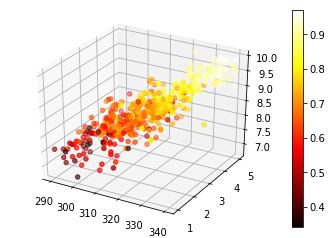

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
img = ax.scatter(eh, dun, su, c=hariu, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [11]:
Y_pred=[]
for i in range(len(eh)):    
    Y_pred+=[(a*eh[i]+b*dun[i]+c*su[i]+d)*r+ (e*eh[i]+f*dun[i]+g*su[i]+h)*j+k]

## Predict hiisen hariug

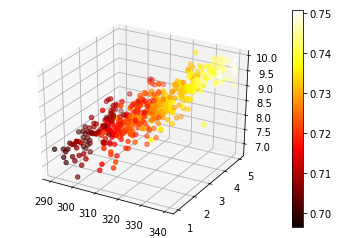

In [12]:
fig = plt.figure()
ax1 = fig.add_subplot(111, projection='3d')
img = ax1.scatter(eh, dun, su, c=Y_pred, cmap=plt.hot())
fig.colorbar(img)
plt.show()

In [13]:
Y_pred

[0.7470743678411773,
 0.7324045150085103,
 0.7221815216687346,
 0.7301286695209365,
 0.7214616216114028,
 0.7393080110333015,
 0.727444273872797,
 0.7148806697467305,
 0.7101403173688613,
 0.7307637711877817,
 0.7318062751902168,
 0.7356001162194903,
 0.7368803659915577,
 0.7140747636889517,
 0.7184367650063717,
 0.7215185165517242,
 0.7257387647533513,
 0.7248837743286621,
 0.7270190145254187,
 0.7123692545695062,
 0.7181990192367396,
 0.7315216211336559,
 0.7381137074766961,
 0.7442772105674011,
 0.7464582112261111,
 0.7493022170018315,
 0.7300527099588667,
 0.7043551653386056,
 0.7007990700789644,
 0.7144051782074662,
 0.7084336604244401,
 0.733228278078077,
 0.7470263715142575,
 0.7493022170018315,
 0.7419544567928984,
 0.7297692037272814,
 0.7086714061940722,
 0.7075798178247265,
 0.7100443247150219,
 0.7132209210892382,
 0.7149755145755943,
 0.7232251734961455,
 0.7216614174924925,
 0.7404833695381279,
 0.7359327068179862,
 0.7311912066151414,
 0.7382554605924889,
 0.748780965000